In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv('spotify.xls',index_col=0)

In [3]:
data

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_996,8,0,11,10,1,10,13,13,10,6,...,10,0,8,4,0,7,13,7,2,6
user_997,7,6,9,6,15,6,14,2,9,7,...,15,9,2,2,6,1,0,5,15,11
user_998,6,2,1,5,1,7,2,4,4,0,...,0,13,6,13,0,1,11,13,6,13
user_999,7,0,8,12,6,2,6,2,0,12,...,14,7,12,3,5,15,5,11,9,12


Non - negative matrix factorisation

In [4]:
nmf = NMF(n_components = 100 ,max_iter = 1000,random_state = 200)

In [5]:
X = data.values

In [6]:
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [7]:
nmf.fit(X)

E:\ANACONDA3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
E:\ANACONDA3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(max_iter=1000, n_components=100, random_state=200)

In [8]:
user_matrix = nmf.transform(X)

In [9]:
user_matrix.shape

(1000, 100)

In [10]:
user_matrix

array([[0.03041152, 0.        , 6.03735754, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10450949, 0.        , ..., 0.        , 1.51397869,
        0.        ],
       [0.        , 3.09227919, 0.        , ..., 0.62299824, 0.        ,
        0.        ],
       ...,
       [0.        , 1.26239448, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.11442141, 3.90306648, 0.5963574 , ..., 0.        , 0.51928477,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.32054707, 0.        ,
        0.        ]])

In [11]:
song_matrix = nmf.components_.T

In [12]:
song_matrix.shape

(5000, 100)

In [13]:
song_matrix

array([[0.29227977, 0.29155378, 0.23095434, ..., 0.02158349, 0.        ,
        0.042259  ],
       [0.2201218 , 0.        , 0.        , ..., 0.        , 0.52120311,
        0.16391248],
       [0.        , 0.16101005, 0.        , ..., 0.22639116, 0.26109955,
        0.14051861],
       ...,
       [0.        , 0.29521502, 0.02888085, ..., 0.31876971, 0.2938576 ,
        0.2803698 ],
       [0.21569302, 0.10762248, 0.04239307, ..., 0.17080385, 0.03336278,
        0.28784931],
       [0.10459146, 0.24942716, 0.12342307, ..., 0.31145263, 0.17757793,
        0.22799469]])

Steps for building a recommendation system
1. Consider recommending songs to user 1 located at row 0
2. Find the Euclidean distance between user 1 and the remaiing 999 users
3. Find the top_n songs heard by 5 users which are close to user 1
4. Recommend all the n songs to user 1

Calculating the Euclidean distance

In [14]:
def distance(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2)for x in range (len(u1))]),0.5)

In [15]:
distance(user_matrix[0],user_matrix[1])

16.400235200419893

In [16]:
def distance_baseuser(base_user,user_matrix):
    import sys
    dist = []
    for i in range(len(user_matrix)):
        if base_user != i:
            dist.append(distance(user_matrix[base_user],user_matrix[i]))
        else:
            dist.append(sys.float_info.max)
    return dist
                   

In [17]:
dist_u = distance_baseuser(0,user_matrix)

In [18]:
dist_u

[1.7976931348623157e+308,
 16.400235200419893,
 15.537635020255562,
 14.639473651088164,
 14.007544902352786,
 13.971320821432071,
 14.458815383946678,
 15.439919101257976,
 15.365881759639283,
 14.750585290630834,
 13.757119243031465,
 13.43628155733106,
 14.23404596360702,
 14.673781427364645,
 15.645889217625568,
 15.713779804395632,
 14.174156010903904,
 14.151881525205624,
 14.127183453625834,
 14.872031632771026,
 14.423506733469713,
 15.565049450047663,
 14.662728068088676,
 13.844900902166062,
 15.712321900675336,
 15.466713621156096,
 15.824884352932457,
 15.20834665538683,
 15.042134139988123,
 14.89760973109466,
 14.087798476781057,
 14.538880224134541,
 14.770670734112583,
 14.949431884206332,
 13.641154833599087,
 14.249887985553908,
 14.697785817202334,
 16.97115950079925,
 14.722157373019302,
 14.574156282372766,
 12.134159028529215,
 15.540593520140478,
 15.927465373061052,
 13.992981666187642,
 13.674354874026792,
 15.547516231931485,
 14.24059747162653,
 14.1200086925

In [19]:
user_close = np.argsort(dist_u)[0:5]

In [20]:
user_close

array([313, 379, 174, 882, 687], dtype=int64)

In [21]:
#FINDING out the songs the closer user is listening to

In [22]:
for i in user_close:
    print('Songs heard by user ',i, ' are:')
    temp = pd.DataFrame(data.iloc[i])
    print(temp[temp.values!=0].index)

Songs heard by user  313  are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4690)
Songs heard by user  379  are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4674)
Songs heard by user  174  are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', 

In [23]:
#Suggesting top5 songs to user 1
def top_5songs(user_close,data):
    temp = data.iloc[user_close]
    dic = temp.max().to_dict()
    sort_dic = sorted(dic.items(),key=lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse = True)[0:5]
    
    return [x[0] for x in sort_dic]

In [24]:
top_5songs(user_close,data)

['song_998', 'song_996', 'song_991', 'song_990', 'song_988']

In [25]:
#Clustering algorithm

In [26]:
mse = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(song_matrix)
    mse[k] = kmeans.inertia_

In [27]:
#plotting elbow curve to get best value of k

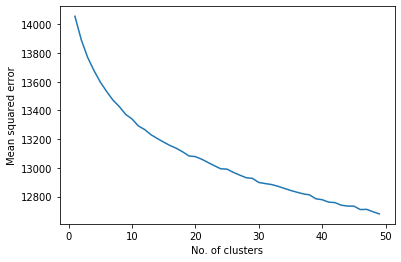

In [28]:
plt.figure()
plt.plot(list(mse.keys()),list(mse.values()))
plt.xlabel('No. of clusters')
plt.ylabel('Mean squared error')
plt.show()

In [29]:
#Note : Recommending songs to users based on the type of song the user hears (finding out the cluster in which the user's song is located.) 
#Finding out songs of that cluster maximum no. of times and suggesting them to the user.
#This is a cluster based approach and not closeness based approach

In [30]:
#Function for recommending songs
def recommend_songs(data,clusters,song_matrix,fav_songs,n_recommend):
    
    #fitting the kmean algorithm
    kmeans = KMeans(n_clusters = clusters, max_iter = 1000).fit(song_matrix)
    
    #Getting the index value of the user's favourite song
    index_favsong = data.columns.to_list().index(fav_songs)
    
    # No. of times the song is heard 
    song_vector = song_matrix[index_favsong]
    
    #Creating clusters of the song 
    songs_in_cluster = list(kmeans.predict(song_matrix))
    
    #Finding the cluster of the fav song and Checking the no. of times the user's fav song is heard and finding similar songs inside the cluster 
    songs_selected_from_clusters = [x for x in range(len(songs_in_cluster))if songs_in_cluster[x] == kmeans.predict([song_vector])]
    
    #Collecting all the songs in the song matrix on the basis of the cluster which was identified 
    song_cluster = song_matrix[songs_selected_from_clusters]
    
    #Finding the nearest songs to the user's favourite song
    recommend = NearestNeighbors(n_neighbors = n_recommend)
    
    #Identifying the nearest neighbors in our cluster
    recommend.fit(song_cluster)
    
    #Picking up the songs to recommend
    recommended_songs = recommend.kneighbors([song_matrix[index_favsong]])[1]
    
    #Printing the recommended songs
    print(recommended_songs)

In [31]:
recommend_songs(data,12,song_matrix,'song_10',5)

[[  1 338 200 103  95]]
